In [58]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load your features dataset
data = pd.read_csv('data/HR_data.csv')

#### Converting data to integer ####
data['Round'] = data['Round'].str.lstrip('round_').astype(int)
data['Phase'] = data['Phase'].str.lstrip('phase').astype(int)

### Dropping data ###
#show missing value in features at EDA_TD_P_RT and EDA_TD_P_ReT
#print(data[data.isna().any(axis=1)])
#just drop this row
data = data.dropna()

### splitting into features and responses ###
features = data.iloc[:, :-12]
response = data.iloc[:, -16:]
print(response.head())


#Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


   Round  Phase  Individual  Puzzler  Frustrated Cohort  upset  hostile  \
0      3      3           1        1         2.0   D1_4    1.0      1.0   
1      3      2           1        1         3.0   D1_4    2.0      1.0   
2      3      1           1        1         2.0   D1_4    1.0      1.0   
3      2      3           1        1         2.0   D1_4    1.0      1.0   
4      2      2           1        1         2.0   D1_4    3.0      1.0   

   alert  ashamed  inspired  nervous  attentive  afraid  active  determined  
0    2.0      1.0       2.0      2.0        3.0     1.0     2.0         2.0  
1    3.0      2.0       2.0      2.0        3.0     1.0     3.0         3.0  
2    2.0      1.0       3.0      2.0        3.0     2.0     3.0         3.0  
3    2.0      1.0       3.0      2.0        3.0     2.0     3.0         3.0  
4    3.0      2.0       3.0      3.0        4.0     2.0     4.0         4.0  


In [59]:
# Display column names
print("Column Names:")
print(data.columns)

# Display data types of each column
print("\nData Types:")
print(data.dtypes)

# Display basic statistics for numerical columns
print("\nBasic Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Display the first few rows of the data
print("\nFirst Few Rows:")
print(data.head())

Column Names:
Index(['Unnamed: 0', 'HR_TD_Mean', 'HR_TD_Median', 'HR_TD_std', 'HR_TD_Min',
       'HR_TD_Max', 'HR_TD_AUC', 'HR_TD_Kurtosis', 'HR_TD_Skew',
       'HR_TD_Slope_min', 'HR_TD_Slope_max', 'HR_TD_Slope_mean', 'HR_TD_Slope',
       'TEMP_TD_Mean', 'TEMP_TD_Median', 'TEMP_TD_std', 'TEMP_TD_Min',
       'TEMP_TD_Max', 'TEMP_TD_AUC', 'TEMP_TD_Kurtosis', 'TEMP_TD_Skew',
       'TEMP_TD_Slope_min', 'TEMP_TD_Slope_max', 'TEMP_TD_Slope_mean',
       'TEMP_TD_Slope', 'EDA_TD_P_Mean', 'EDA_TD_P_Median', 'EDA_TD_P_std',
       'EDA_TD_P_Min', 'EDA_TD_P_Max', 'EDA_TD_P_AUC', 'EDA_TD_P_Kurtosis',
       'EDA_TD_P_Skew', 'EDA_TD_P_Slope_min', 'EDA_TD_P_Slope_max',
       'EDA_TD_P_Slope_mean', 'EDA_TD_P_Slope', 'EDA_TD_T_Mean',
       'EDA_TD_T_Median', 'EDA_TD_T_std', 'EDA_TD_T_Min', 'EDA_TD_T_Max',
       'EDA_TD_T_AUC', 'EDA_TD_T_Kurtosis', 'EDA_TD_T_Skew',
       'EDA_TD_T_Slope_min', 'EDA_TD_T_Slope_max', 'EDA_TD_T_Slope_mean',
       'EDA_TD_T_Slope', 'EDA_TD_P_Peaks', 'EDA_TD_P_RT

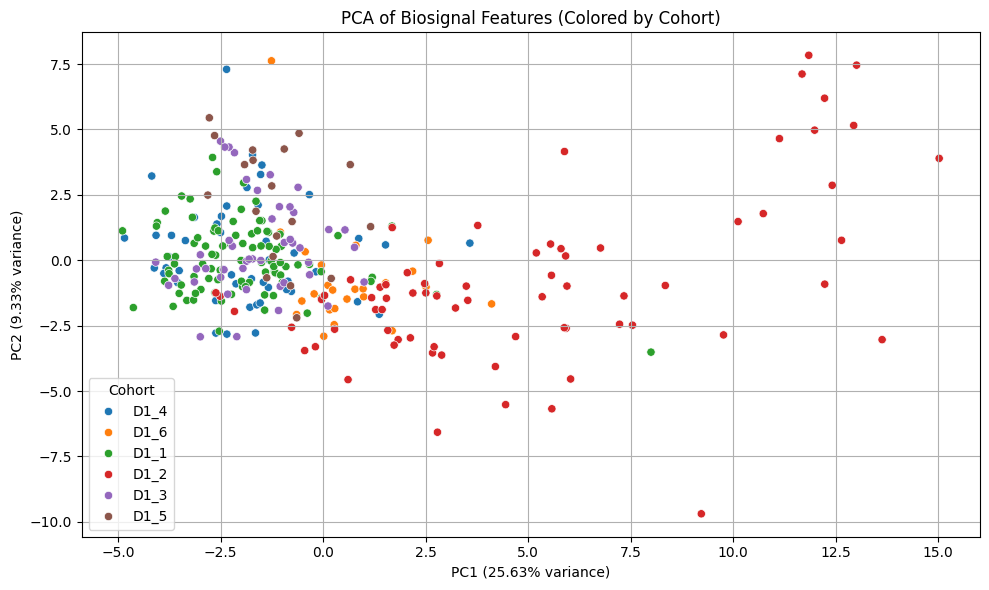

In [84]:
# Perform PCA
pca = PCA(n_components=2)
pca_scores = pca.fit_transform(features_scaled)

# Put scores in a DataFrame for easier plotting
pca_df = pd.DataFrame(data=pca_scores, columns=['PC1', 'PC2'])

# Add your response variable to the PCA dataframe for coloring
#
pca_df['Cohort'] = response['Cohort']
pca_df['Frustrated'] = response['Frustrated']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cohort', palette='tab10')
plt.title('PCA of Biosignal Features (Colored by Cohort)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)')
plt.legend(title='Cohort')
plt.grid(True)
plt.tight_layout()
plt.show()



## Gammelt

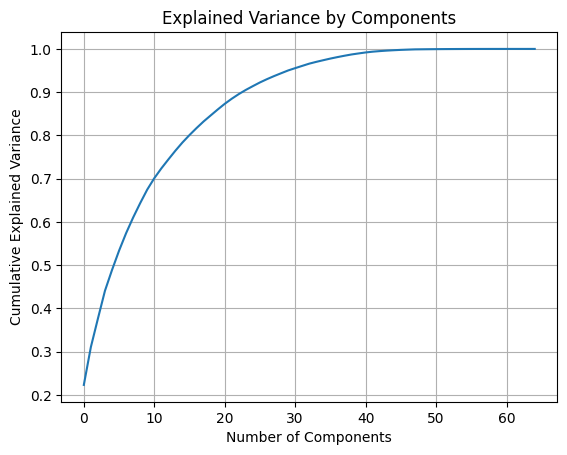

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Fit PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()


In [25]:
# Loadings (eigenvectors)
loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f'PC{i+1}' for i in range(X.shape[1])],
                        index=X_scaled.columns)

# Scores (transformed data)
scores = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X.shape[1])])


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [15]:
from sklearn.decomposition import SparsePCA

spca = SparsePCA(n_components=5, alpha=1, random_state=42)
X_spca = spca.fit_transform(X_scaled)

# Sparse loadings
sparse_loadings = pd.DataFrame(spca.components_.T, 
                               columns=[f'SPC{i+1}' for i in range(5)],
                               index=X.columns)

# Scores (new representation)
sparse_scores = pd.DataFrame(X_spca, columns=[f'SPC{i+1}' for i in range(5)])


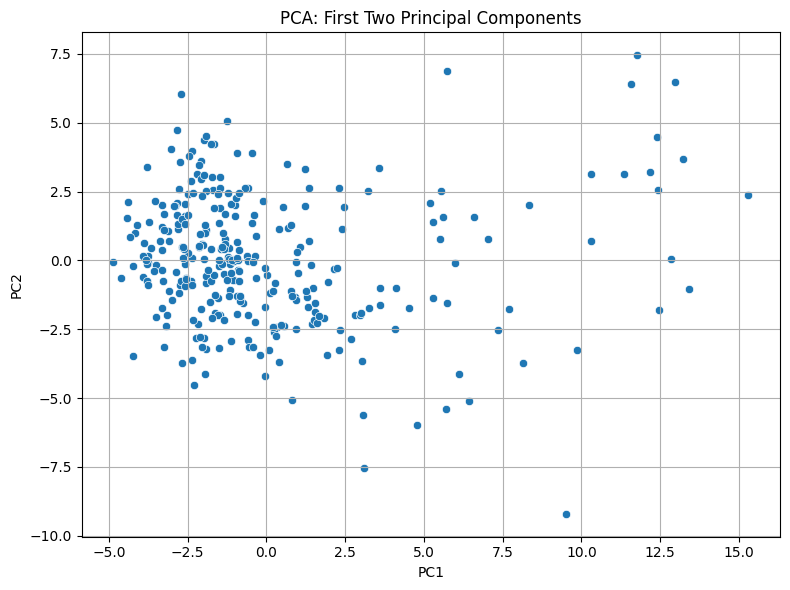

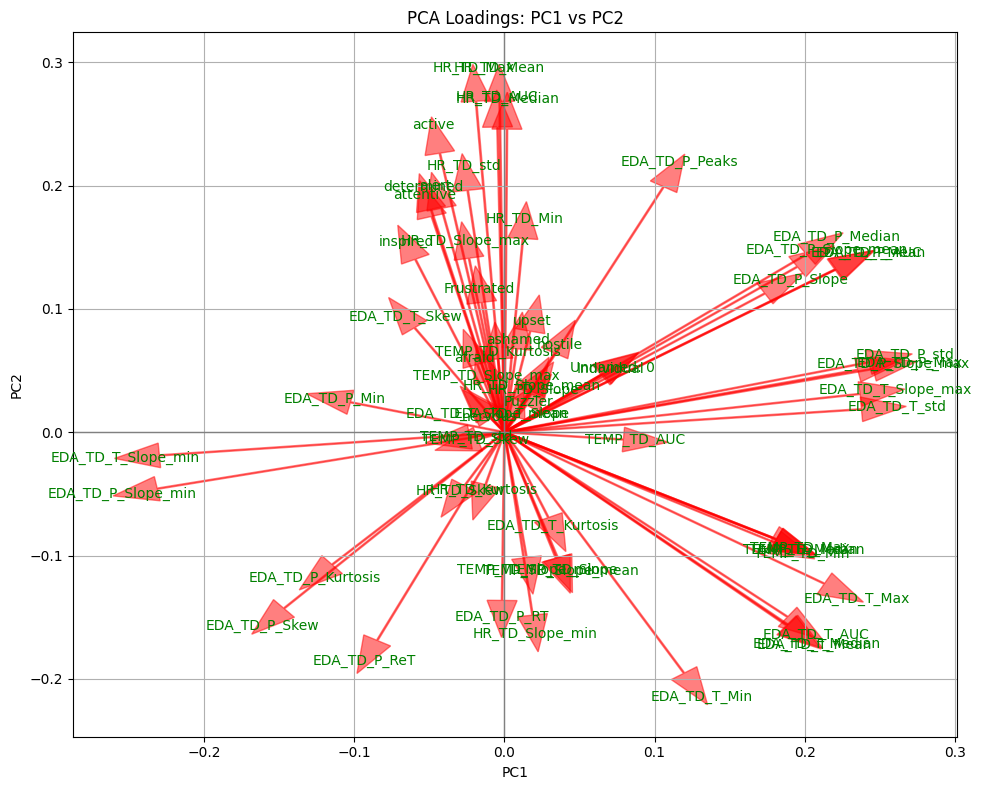

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming 'scores' and 'loadings' DataFrames have already been defined earlier in the code.

# Plot the first two principal components (scores)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scores["PC1"], y=scores["PC2"])
plt.title("PCA: First Two Principal Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot loadings for PC1 and PC2
plt.figure(figsize=(10, 8))
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
for i in range(loadings.shape[0]):
    plt.arrow(0, 0, loadings.iloc[i, 0], loadings.iloc[i, 1],
              color='r', alpha=0.5, head_width=0.02)
    plt.text(loadings.iloc[i, 0]*1.1, loadings.iloc[i, 1]*1.1,
             loadings.index[i], color='g', ha='center', va='center')
plt.title("PCA Loadings: PC1 vs PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.show()


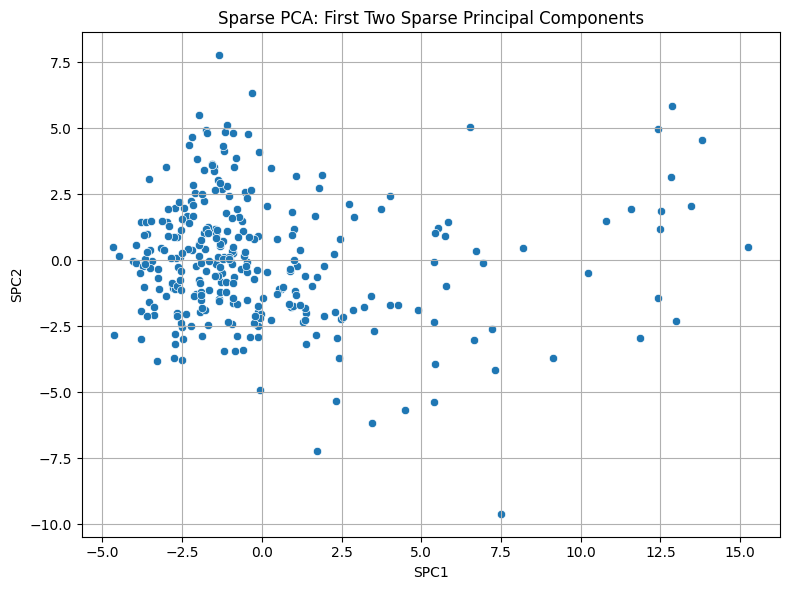

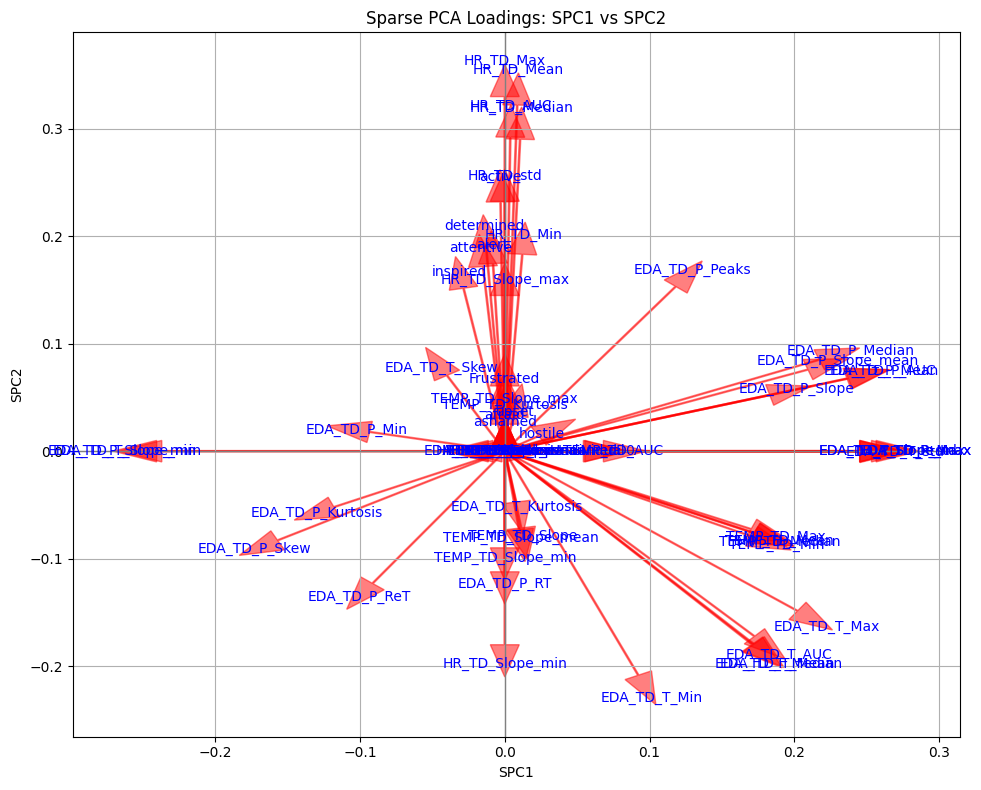

In [19]:
from sklearn.decomposition import SparsePCA

# Fit Sparse PCA with 2 components for visualization
spca = SparsePCA(n_components=2, alpha=1, random_state=42)
X_spca = spca.fit_transform(X_scaled)

# Create DataFrames for sparse PCA scores and loadings
sparse_scores = pd.DataFrame(X_spca, columns=["SPC1", "SPC2"])
sparse_loadings = pd.DataFrame(spca.components_.T,
                               columns=["SPC1", "SPC2"],
                               index=X.columns)

# Plot the first two sparse principal components (scores)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=sparse_scores["SPC1"], y=sparse_scores["SPC2"])
plt.title("Sparse PCA: First Two Sparse Principal Components")
plt.xlabel("SPC1")
plt.ylabel("SPC2")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot sparse loadings for SPC1 and SPC2
plt.figure(figsize=(10, 8))
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
for i in range(sparse_loadings.shape[0]):
    plt.arrow(0, 0, sparse_loadings.iloc[i, 0], sparse_loadings.iloc[i, 1],
              color='r', alpha=0.5, head_width=0.02)
    plt.text(sparse_loadings.iloc[i, 0]*1.1, sparse_loadings.iloc[i, 1]*1.1,
             sparse_loadings.index[i], color='b', ha='center', va='center')
plt.title("Sparse PCA Loadings: SPC1 vs SPC2")
plt.xlabel("SPC1")
plt.ylabel("SPC2")
plt.grid(True)
plt.tight_layout()
plt.show()


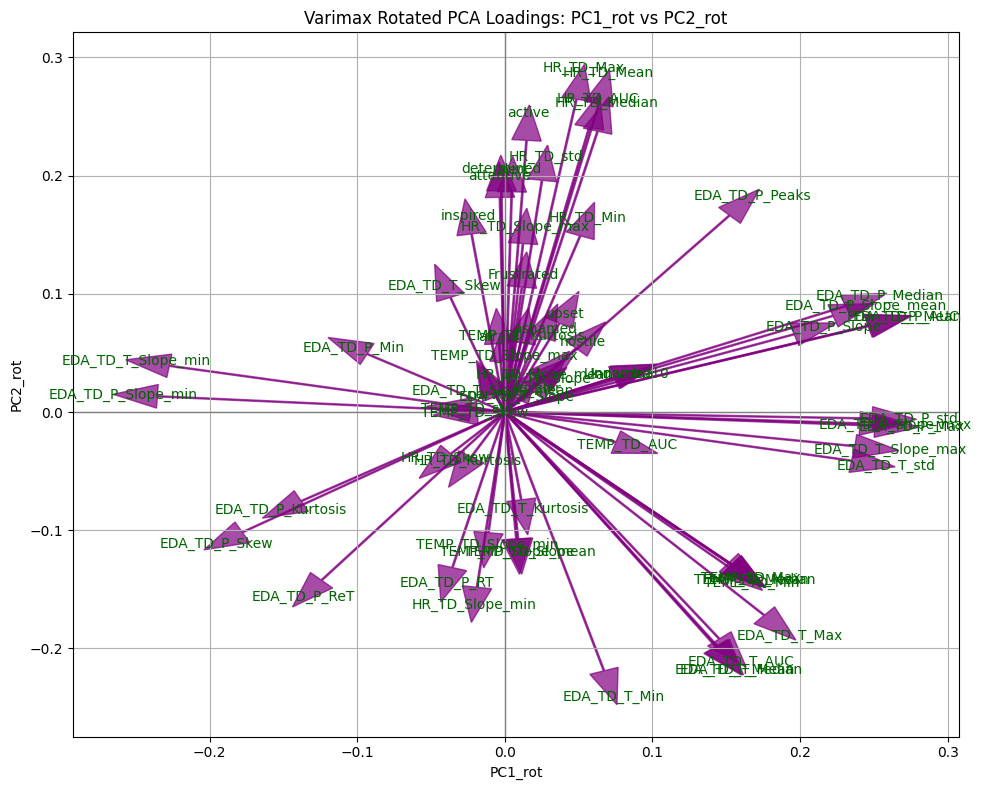

In [22]:
from factor_analyzer.rotator import Rotator

# Apply Varimax rotation on PCA loadings
rotator = Rotator()
rotated_loadings = rotator.fit_transform(loadings.iloc[:, :2].values)

# Convert to DataFrame for easier plotting
rotated_loadings_df = pd.DataFrame(rotated_loadings, 
                                    columns=["PC1_rot", "PC2_rot"],
                                    index=loadings.index)

# Plot Varimax-rotated loadings
plt.figure(figsize=(10, 8))
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
for i in range(rotated_loadings_df.shape[0]):
    plt.arrow(0, 0, rotated_loadings_df.iloc[i, 0], rotated_loadings_df.iloc[i, 1],
              color='purple', alpha=0.7, head_width=0.02)
    plt.text(rotated_loadings_df.iloc[i, 0]*1.1, rotated_loadings_df.iloc[i, 1]*1.1,
             rotated_loadings_df.index[i], color='darkgreen', ha='center', va='center')
plt.title("Varimax Rotated PCA Loadings: PC1_rot vs PC2_rot")
plt.xlabel("PC1_rot")
plt.ylabel("PC2_rot")
plt.grid(True)
plt.tight_layout()
plt.show()


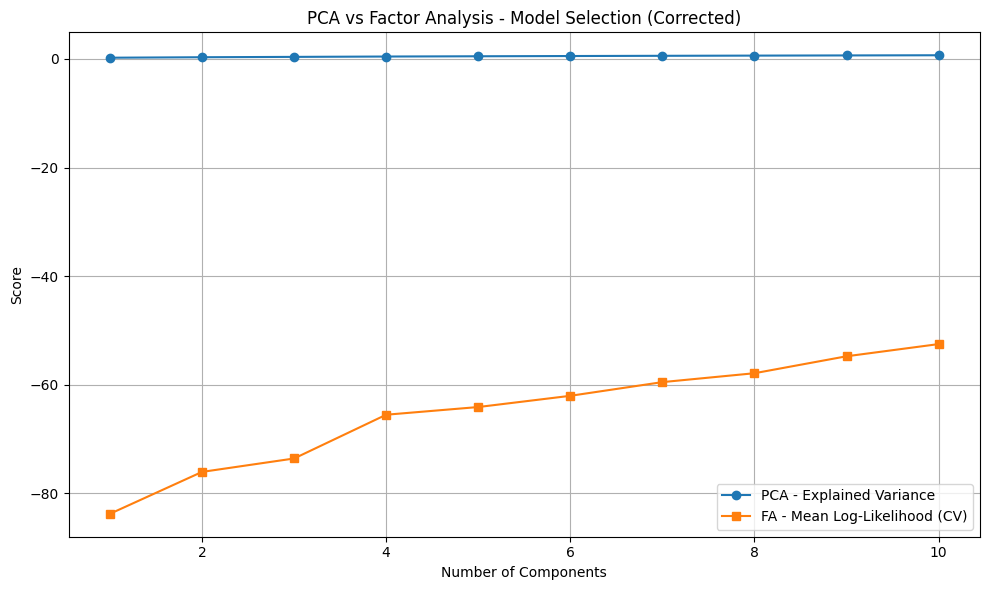

In [24]:
from sklearn.model_selection import KFold
from sklearn.decomposition import FactorAnalysis

# Manually compute the log-likelihood of Factor Analysis for each number of components
fa_log_likelihoods = []

for n in n_components_range:
    fold_loglik = []
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    for train_idx, test_idx in kf.split(X_scaled):
        X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
        fa = FactorAnalysis(n_components=n)
        fa.fit(X_train)
        
        # Compute log-likelihood on the test set
        loglik = fa.score(X_test)
        fold_loglik.append(loglik)
    
    fa_log_likelihoods.append(np.mean(fold_loglik))

# Plot updated results
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, pca_scores, label='PCA - Explained Variance', marker='o')
plt.plot(n_components_range, fa_log_likelihoods, label='FA - Mean Log-Likelihood (CV)', marker='s')
plt.xlabel("Number of Components")
plt.ylabel("Score")
plt.title("PCA vs Factor Analysis - Model Selection (Corrected)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
